In [3]:
#import packages
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import scipy.stats as stats
from arch import arch_model
import matplotlib.pyplot as plt

In [5]:
#get financial data
ticker = 'TSLA'
start = dt.datetime(2016, 1, 1)
#end = dt.datetime(2020, 1, 1)
end = dt.datetime.today()
data = pdr.get_data_yahoo(ticker, start, end)
data.tail()

#ret = data['Adj Close'].pct_change().dropna()
ret = np.log(1 + data['Adj Close'].pct_change()).dropna()
print(ret.tail())

ann_ret = (1 + np.mean(ret))**252 - 1
print("Annualized returns: ", round(ann_ret, 4)*100, "%")
ann_vol = ret.std() * np.sqrt(252)
print("Annualized volatility: ", round(ann_vol, 4)*100, "%")

Date
2021-01-21   -0.006441
2021-01-22    0.001951
2021-01-25    0.039555
2021-01-26    0.002597
2021-01-27    0.005849
Name: Adj Close, dtype: float64
Annualized returns:  80.44 %
Annualized volatility:  57.74 %


Cumulative returns assuming an initial investment of $100

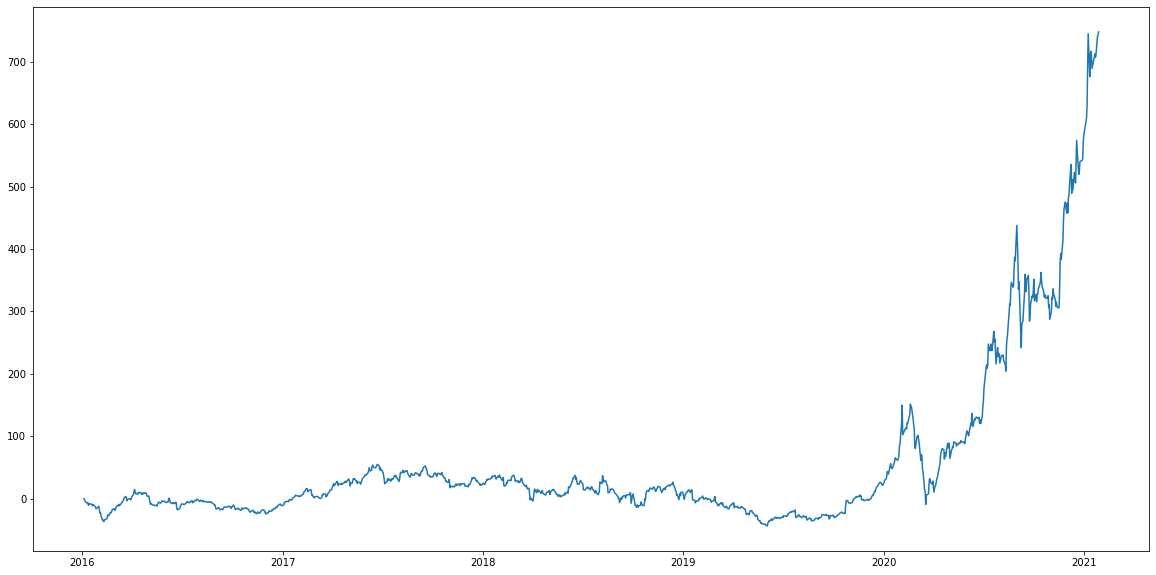

In [7]:
plt.plot(((1+ret).cumprod() - 1)*100)
plt.rcParams["figure.figsize"] = (20, 10)

Mean:  0.0023448667095062182
Volatility: 0.03635637426284595
Skewness:  -0.2306196383894196
Kurtosis:  6.076535026315206


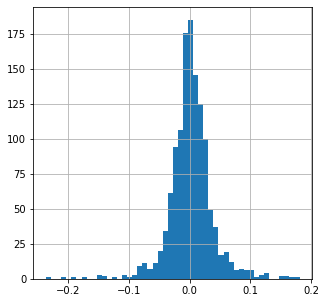

In [8]:
print("Mean: ", np.mean(ret))
print("Volatility:", np.std(ret))
print("Skewness: ", stats.skew(ret))
print("Kurtosis: ", stats.kurtosis(ret)) #excess

plt.rcParams["figure.figsize"] = (5, 5)
ret.hist(bins = 50)

Distribution shows small positive skew and large excess kurtosis.

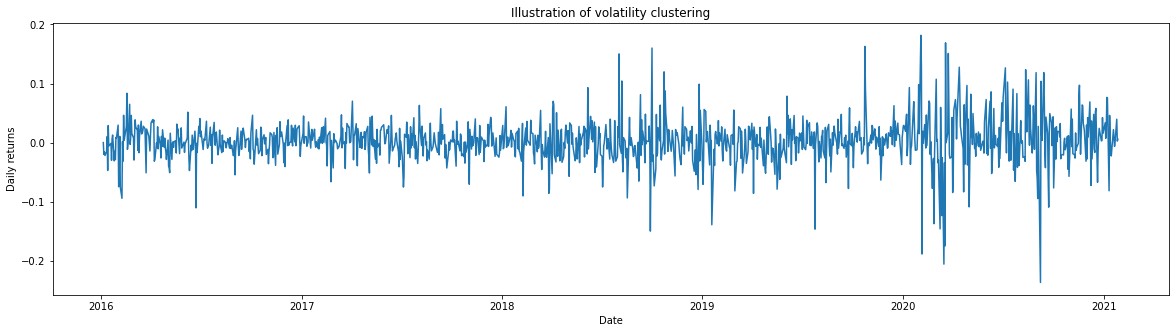

In [10]:
plt.plot(ret)
plt.title('Illustration of volatility clustering')
plt.ylabel('Daily returns')
plt.xlabel('Date')
plt.rcParams["figure.figsize"] = (20, 5)

In [107]:
ret

Date
2017-01-04    0.046085
2017-01-05   -0.001057
2017-01-06    0.009967
2017-01-09    0.009912
2017-01-10   -0.006097
                ...   
2021-01-21   -0.006420
2021-01-22    0.001953
2021-01-25    0.040348
2021-01-26    0.002600
2021-01-27    0.001846
Name: Adj Close, Length: 1023, dtype: float64